<a href="https://colab.research.google.com/github/k4404c/tensorflow_workbook/blob/main/tensorflow2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#NN classification with tensorflow

In [ ]:
from sklearn.datasets import make_circles

n = 1000
X,y = make_circles(n, noise = 0.02, random_state = 42)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

circles = pd.DataFrame({'X0':X[:,0], 'X1':X[:,1], "label":y})
circles

,X0,X1,label
0,0.760266,0.223878,1
1,-0.767222,0.145542,1
2,-0.808159,0.148944,1
3,-0.376028,0.703209,1
4,0.440510,-0.897617,0
...,...,...,...
995,0.241536,0.953294,0
996,-0.975298,-0.264479,0
997,-0.141235,-0.801951,1
998,0.675090,-0.754657,0


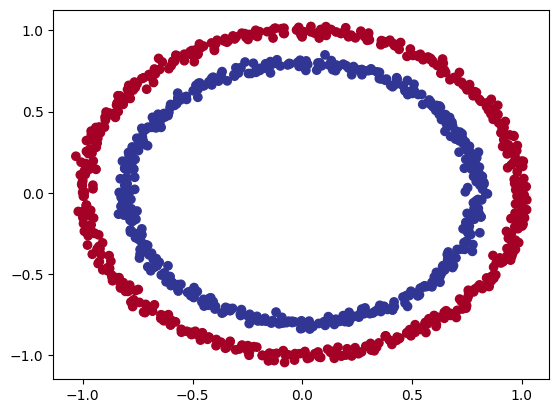

In [ ]:
plt.scatter(X[:,0], X[:,1], c =  y, cmap=plt.cm.RdYlBu);

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
X[0], y[0]

(array([0.76026594, 0.22387823]), 1)

In [ ]:
import tensorflow as tf

model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)

])

model1.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['accuracy']
)

model1.fit(X,y, epochs = 5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 5.6986 - accuracy: 0.4780
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 4.2419 - accuracy: 0.4730
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 1.4120 - accuracy: 0.4880
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7256 - accuracy: 0.4980
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7046 - accuracy: 0.4940


In [ ]:

model1.fit(X,y, epochs = 200, verbose = 0)
model1.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933183073997498, 0.5]

In [ ]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)

])

model2.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['accuracy']
)

model2.fit(X,y, epochs = 200, verbose=0)
model1.evaluate(X,y) #STILL GUESING NEED TO IMPROVE

32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933183073997498, 0.5]

In [ ]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)

])

model3.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

model3.fit(X,y, epochs = 200, verbose=0) #STILL ONLY GETTING 50 %
model1.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933183073997498, 0.5]

In [ ]:
#pred = model3.predict(X)
import numpy as np

def plot_decision_boundry(model, X, y):
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1

  xx,yy = np.meshgrid(np.linspace(x_min,x_max, 100),
                      np.linspace(y_min,y_max, 100))
  x_in = np.c_[xx.ravel() , yy.ravel()] #stack 2d arrays togeter

  y_pred = model.predict(x_in)
  if len(y_pred[0]) > 1:
    print('Multiclass Classification')
    y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape)
  else:
    print('Binary Classification')
    y_pred = np.round(y_pred).reshape(xx.shape
                                      )
  plt.contourf(xx,yy,y_pred, cmap = plt.cm.RdYlBu, alpha = 0.7)
  plt.scatter(X[:,0], X[:,1], c = y , cmap = plt.cm.RdYlBu)
  plt.xlim(xx.min() , xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
Binary Classification


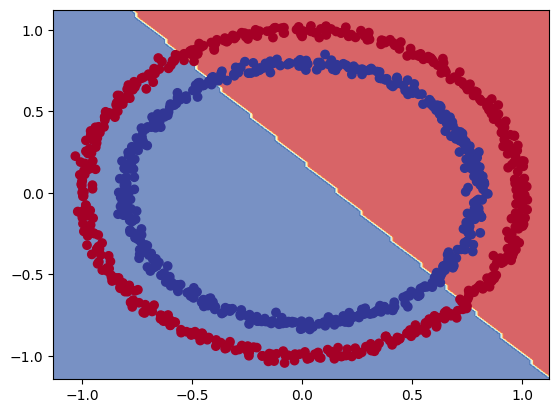

In [ ]:
plot_decision_boundry(model = model3, X = X, y = y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933183073997498, 0.5]

In [ ]:



X_reg = tf.range(0,1000,5)
y_reg = tf.range(100,1100, 5) #X +100

X_reg_train = X_reg[:150]
X_reg_test = X_reg[150:]

y_reg_train = y_reg[:150]
y_reg_test = y_reg[150:]

model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(None, 1)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)

])

model3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

model3.fit(tf.expand_dims(X_reg_train, axis = -1) , y_reg_train, epochs = 100)



Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 559.2170 - accuracy: 0.0000e+00
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 451.5839 - accuracy: 0.0000e+00
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 353.3469 - accuracy: 0.0000e+00
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 287.3999 - accuracy: 0.0000e+00
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 262.0826 - accuracy: 0.0000e+00
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 255.0934 - accuracy: 0.0000e+00
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 266.0445 - accuracy: 0.0000e+00
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 270.3969 - accuracy: 0.0000e+00
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 259.4592 - accuracy: 0.0000e+00
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 2

2/2 [==============================] - 0s 6ms/step


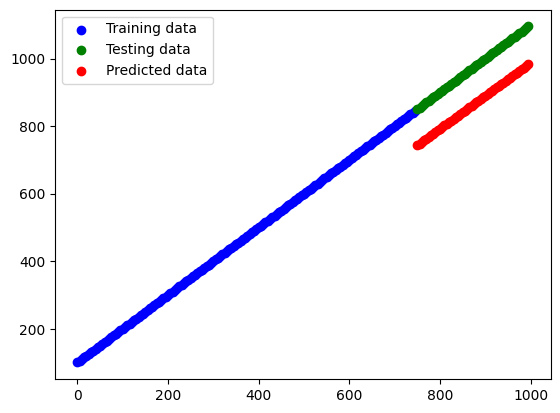

In [ ]:
y_reg_pred = model3.predict(tf.expand_dims(X_reg_test, axis = -1))
plt.scatter(X_reg_train, y_reg_train, c = 'b', label = 'Training data')
plt.scatter(X_reg_test, y_reg_test, c = 'g', label = 'Testing data')
plt.scatter(X_reg_test, y_reg_pred, c = 'r', label = 'Predicted data')
plt.legend()
plt.show()

In [ ]:
model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = 'linear'),


])

model4.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

history = model4.fit(X , y, epochs = 100, verbose = 0)



313/313 [==============================] - 1s 2ms/step
Binary Classification


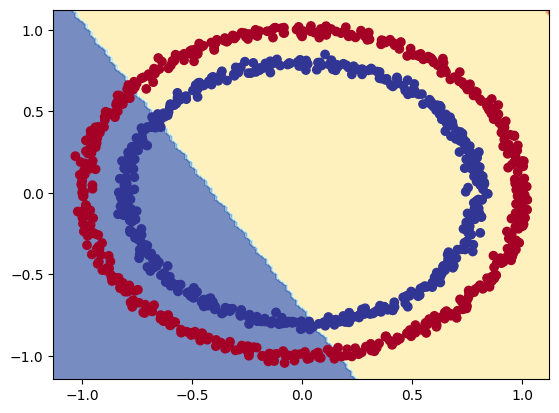

In [ ]:
plot_decision_boundry(model4, X, y) #yellow means either red or blue

In [ ]:
#using non-linear activation
model5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = 'relu'),


])

model5.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

history = model5.fit(X , y, epochs = 100, verbose = 0)



313/313 [==============================] - 1s 3ms/step
Binary Classification


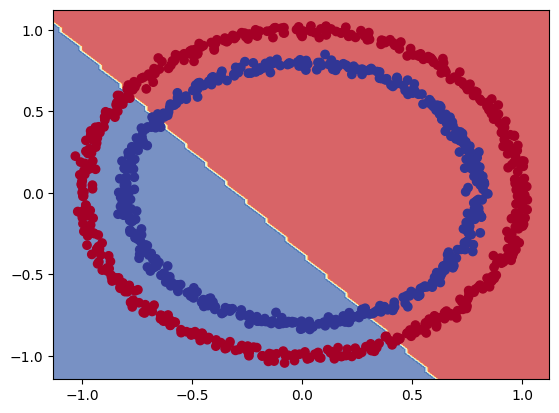

In [ ]:
plot_decision_boundry(model5, X, y)

In [ ]:
#using non-linear activation
model6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1)

])

model6.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

history = model6.fit(X , y, epochs = 250)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 1.4299 - accuracy: 0.4760
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1079 - accuracy: 0.4720
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0273 - accuracy: 0.4680
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9715 - accuracy: 0.4670
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9291 - accuracy: 0.4690
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8975 - accuracy: 0.4650
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8731 - accuracy: 0.4640
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8534 - accuracy: 0.4240
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8381 - accuracy: 0.3800
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8248 - accuracy: 0.3740
Epoch 11/

313/313 [==============================] - 0s 1ms/step
Binary Classification


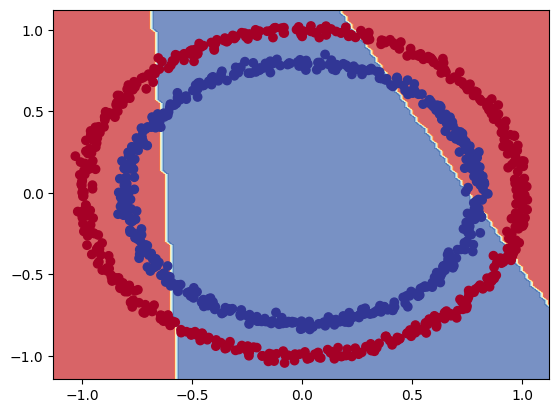

In [ ]:
plot_decision_boundry(model6, X, y)

In [ ]:

model7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')

])

model7.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(lr = 0.001),
    metrics = ['accuracy']
)

history = model7.fit(X , y, epochs = 200)

Epoch 1/200
32/32 [==============================] - 2s 2ms/step - loss: 0.6903 - accuracy: 0.5040
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6900 - accuracy: 0.5050
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6893 - accuracy: 0.5080
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6888 - accuracy: 0.5090
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6883 - accuracy: 0.5190
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6878 - accuracy: 0.5190
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6871 - accuracy: 0.5220
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6866 - accuracy: 0.5280
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6859 - accuracy: 0.5320
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6851 - accuracy: 0.5300
Epoch 11/

313/313 [==============================] - 0s 1ms/step
Binary Classification


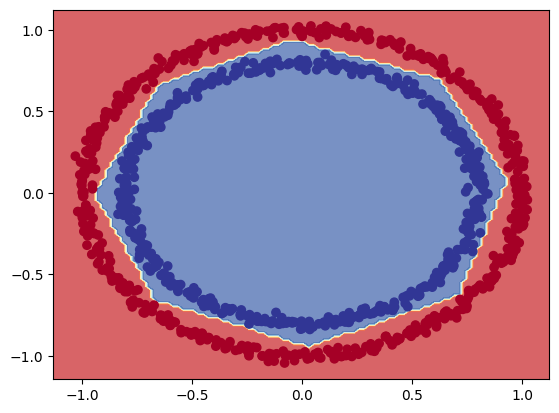

In [ ]:
plot_decision_boundry(model7, X, y)

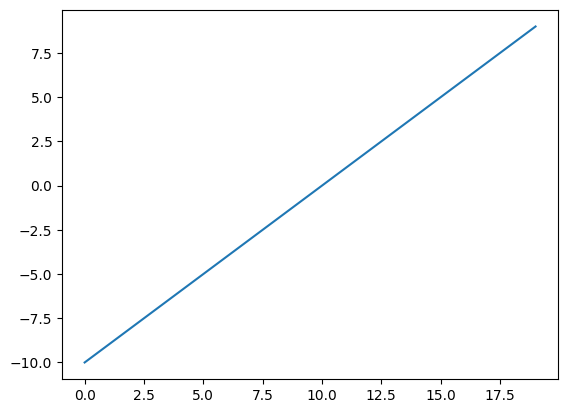

In [ ]:
A = tf.cast(tf.range(-10,10), tf.float32)
plt.plot(A)

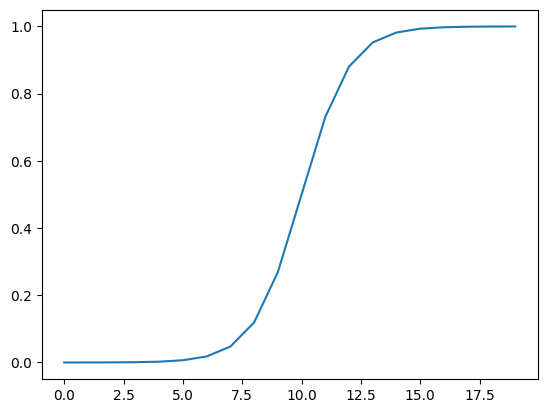

In [ ]:
def sigmoid(x):
  return 1/(1+tf.exp(-x))

plt.plot(sigmoid(A))

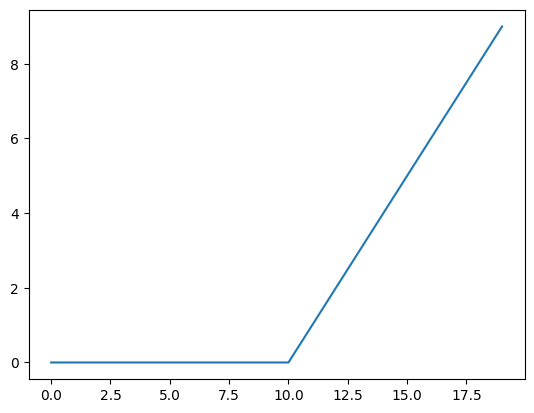

In [ ]:
def relu(x):
  return tf.maximum(0,x)
plt.plot(relu(A))

tf.Tensor(
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True], shape=(20,), dtype=bool)


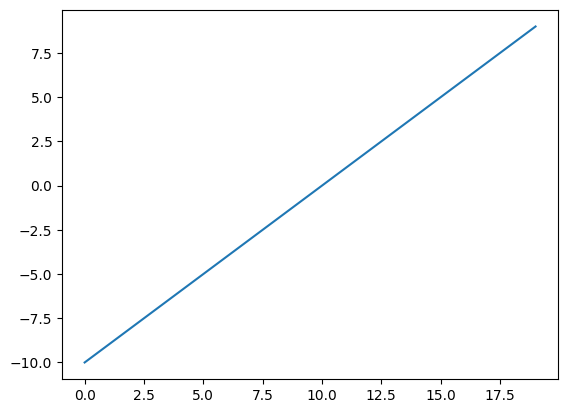

In [ ]:
plt.plot(tf.keras.activations.linear(A))
print(A == tf.keras.activations.linear(A))

In [ ]:
#evaluating and improving classification model - create training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

model8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model8.compile(loss = "binary_crossentropy",
               optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics=["accuracy"])

his = model8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 5ms/step - loss: 0.6859 - accuracy: 0.5125
Epoch 2/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6804 - accuracy: 0.5763
Epoch 3/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6734 - accuracy: 0.5425
Epoch 4/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6629 - accuracy: 0.6363
Epoch 5/25
25/25 [==============================] - 0s 5ms/step - loss: 0.6452 - accuracy: 0.6250
Epoch 6/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6193 - accuracy: 0.6963
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5831 - accuracy: 0.7713
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5470 - accuracy: 0.8050
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5231 - accuracy: 0.7837
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.4856 - accuracy: 0.8188
Epoch 11/25
25/25 [

In [ ]:
model8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 7ms/step - loss: 0.1632 - accuracy: 1.0000


[0.163151353597641, 1.0]

313/313 [==============================] - 1s 2ms/step
Binary Classification
313/313 [==============================] - 0s 2ms/step
Binary Classification


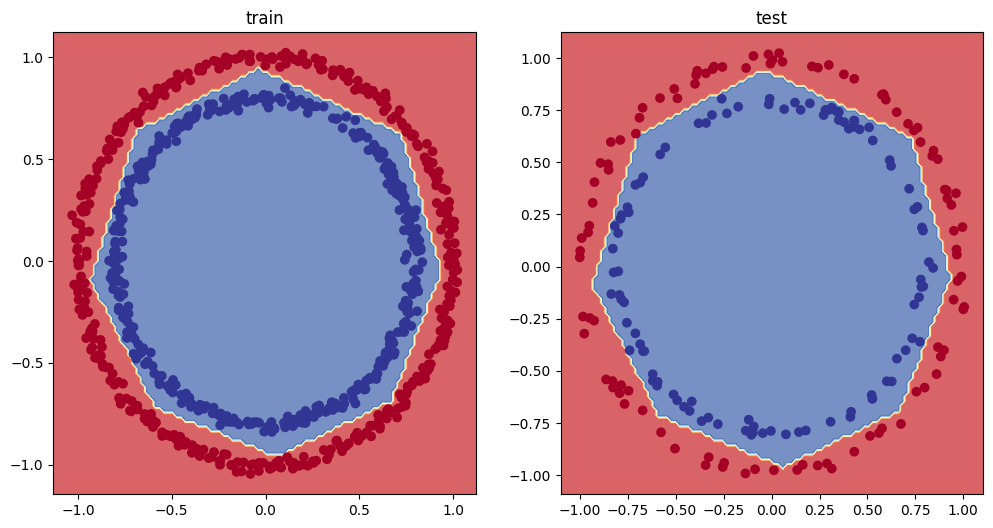

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundry(model8, X=X_train, y = y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundry(model8, X=X_test, y = y_test)

Text(0.5, 1.0, 'model 8 loss curve')

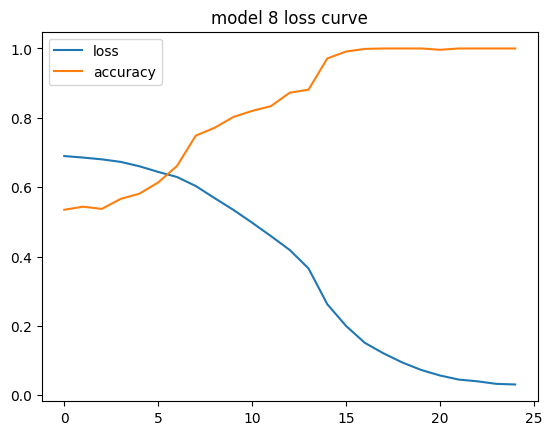

In [ ]:
pd.DataFrame(his.history).plot()
plt.title("model 8 loss curve")

In [ ]:
#using callbacks to get models ideal learning rate
#call back changes during training

model9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4 , activation="relu"),
    tf.keras.layers.Dense(4 , activation="relu"),
    tf.keras.layers.Dense(1 , activation="sigmoid")
])

model9.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["accuracy"])

#introducing the callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

#fit the model with the lr_sched
his9= model9.fit(X_train,
                 y_train,
                 epochs=100,
                 callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 4ms/step - loss: 0.6901 - accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6898 - accuracy: 0.5000 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6896 - accuracy: 0.5000 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6893 - accuracy: 0.5000 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6890 - accuracy: 0.5000 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6887 - accuracy: 0.5038 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6884 - accuracy: 0.5113 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6881 - accuracy: 0.5200 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 5ms/step - loss:

<Axes: xlabel='epochs'>

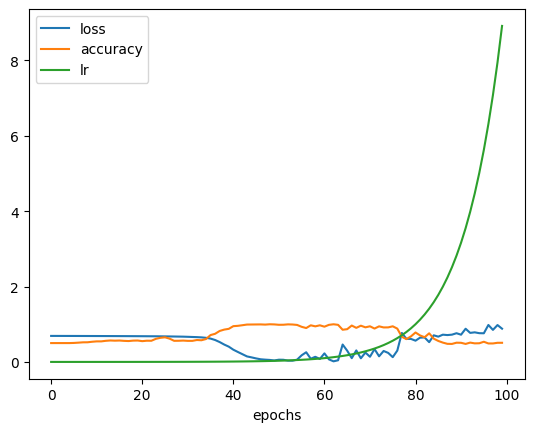

In [ ]:
pd.DataFrame(his9.history).plot(xlabel='epochs')

Text(0, 0.5, 'LR')

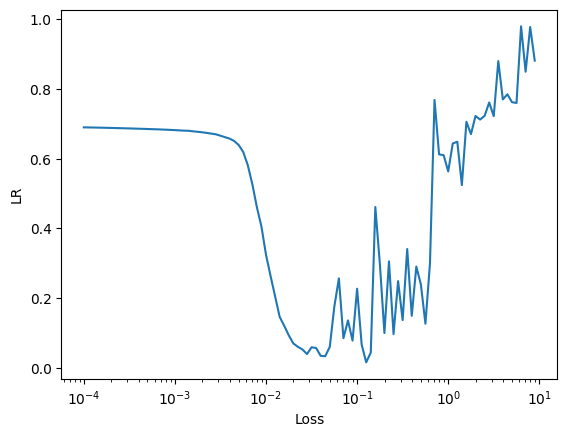

In [ ]:
#plot lr vs loss:
lrs = 1e-4 * 10**(tf.range(100)/20)
plt.figure()
plt.semilogx(lrs,his9.history["loss"])
plt.xlabel("Loss")
plt.ylabel("LR")

#ideal LR is about 10 times smaller than the lowest point

In [ ]:
#observe in model8, we used 10**-2, we see here that if we jump up by a factor, we can
#increase loss

lr = 0.02

model10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model10.compile(loss = "binary_crossentropy",
               optimizer = tf.keras.optimizers.Adam(learning_rate=lr),
               metrics=["accuracy"])

his10 = model10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 3ms/step - loss: 0.6886 - accuracy: 0.5238
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6814 - accuracy: 0.5550
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6683 - accuracy: 0.5863
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6525 - accuracy: 0.5938
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6204 - accuracy: 0.6600
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5763 - accuracy: 0.7150
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5291 - accuracy: 0.7487
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4788 - accuracy: 0.7812
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4321 - accuracy: 0.8150
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3973 - accuracy: 0.8487
Epoch 11/20
25/25 [

In [ ]:
model10.evaluate(X_test, y_test)
model8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0441 - accuracy: 1.0000


[0.04411280155181885, 1.0]

313/313 [==============================] - 1s 2ms/step
Binary Classification
313/313 [==============================] - 0s 2ms/step
Binary Classification


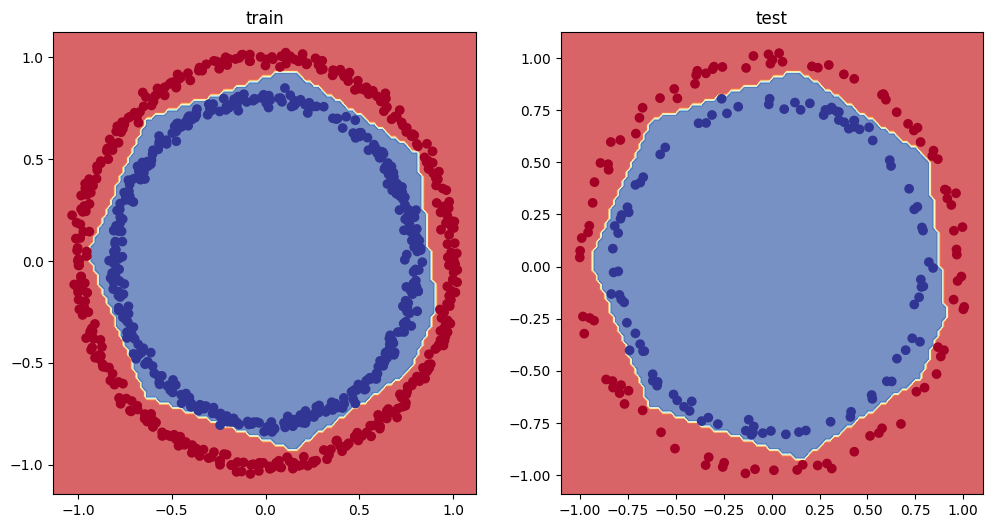

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundry(model10, X=X_train, y = y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundry(model10, X=X_test, y = y_test)

In [ ]:
#more evaluation metrics:
#accuracy,
#precision (less false positives, good for unbalanced training sets),
#recall(false negatives)
#f1 score (mix or precision and recall)
#confusion matrix
#classification report

In [ ]:
#check accuracy:
loss, accuracy = model10.evaluate(X_test, y_test)
print(f"loss: {loss}\nAccuracy: {accuracy}")

7/7 [==============================] - 0s 8ms/step - loss: 0.0525 - accuracy: 1.0000
loss: 0.052493467926979065
Accuracy: 1.0


In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = model10.predict(X_test)
confusion_matrix(y_test, y_pred)

7/7 [==============================] - 0s 4ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
print(y_test[0:10])
print(y_pred[0:10])

[1 0 1 0 1 1 0 0 1 0]
[[9.4478470e-01]
 [1.9999713e-02]
 [9.4478470e-01]
 [3.3231804e-04]
 [9.2438602e-01]
 [9.4478470e-01]
 [6.5585621e-02]
 [2.8111243e-05]
 [9.4478470e-01]
 [3.5019659e-02]]


In [ ]:
#We need to convert probabilities to integer values.
tf.round(y_pred)[0:10]


<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
confusion_matrix(y_test, tf.round(y_pred))

array([[100,   0],
       [  0, 100]])

In [ ]:
#lets make it pretty
import itertools
figsize = (10,10)
cm = confusion_matrix(y_test, tf.round(y_pred))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis] #normalize
cm_norm

array([[1., 0.],
       [0., 1.]])

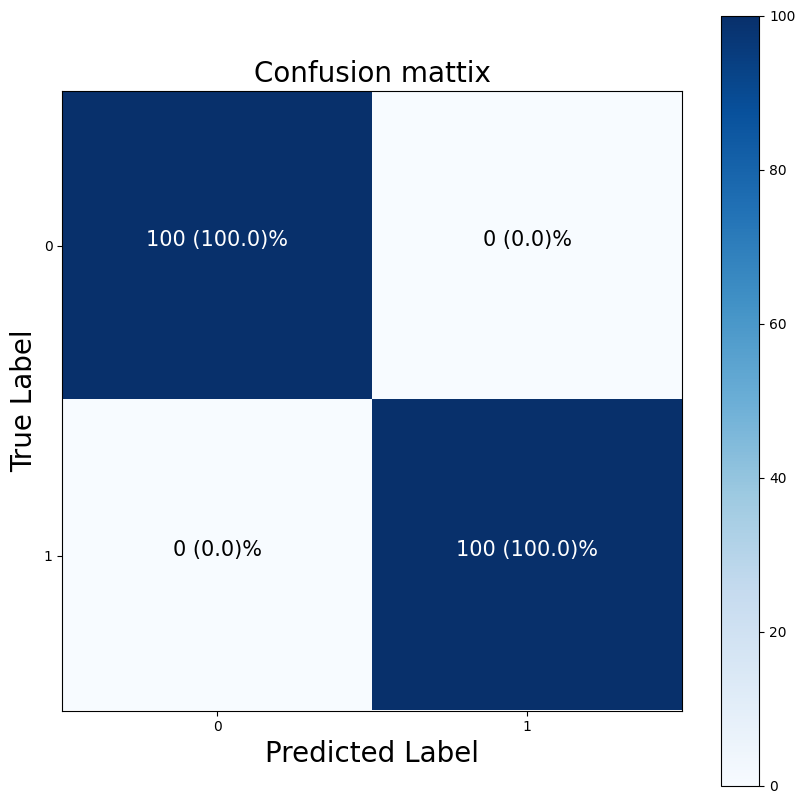

In [ ]:


n_classes = cm.shape[0]
fig, ax = plt.subplots(figsize = figsize)
cax = ax.matshow(cm , cmap = plt.cm.Blues)
fig.colorbar(cax)

classes = False

if classes:
  labels = False
else:
  labels = np.arange(cm.shape[0])

ax.set(title = "Confusion mattix",
       xlabel = "Predicted Label",
       ylabel = "True Label",
       xticks = np.arange(n_classes),
       yticks = np.arange(n_classes),
       xticklabels = labels,
       yticklabels = labels)
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

threshold = (cm.max() + cm.min()) / 2
for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
  plt.text(j,i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f})%",
           horizontalalignment="center",
           color = "white" if cm[i,j] > threshold else "black",
           size = 15)

In [ ]:
#multiclass classification

import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
#already sortred into training testing:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print(f"training sample: {train_data[0]}")
print(f"training label: {train_labels[0]}")

training sample: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

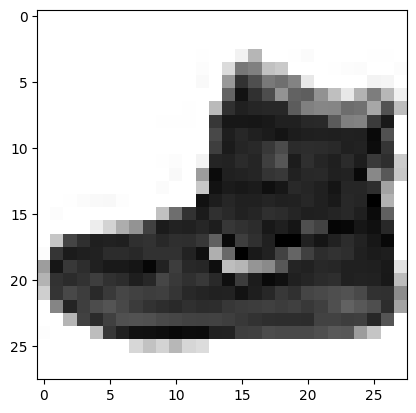

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_data[0], cmap = "binary")

In [ ]:
#create a list for traing label items:
class_names = ['tshirt', 'trouser', 'pullover', 'dress', 'Coat' , 'sandal', 'shirt', 'sneaker' , 'bag', 'ankle boot']
len(class_names)
print(class_names[train_labels[0]])

ankle boot


In [ ]:
#build a model
#input shape = (28x28)
#output shape = 10 (number of classes)
#loss function = CrossEntropy
#activation output = softmax
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax)
])

model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), #sparce lets us use integer representation instead of one-hot
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

non_norm_his = model.fit(train_data, train_labels, epochs = 10, validation_data = (test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 2.5114 - accuracy: 0.1001 - val_loss: 2.3041 - val_accuracy: 0.1002
Epoch 2/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.3034 - accuracy: 0.1009 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3027 - accuracy: 0.0971 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3027 - accuracy: 0.1007 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.0983 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0993 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.0994 - val_loss: 2.3027 - val_accuracy:

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 4)                 3140      
                                                                 
 dense_7 (Dense)             (None, 4)                 20        
                                                                 
 dense_8 (Dense)             (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#NN prefer normalization and standardized.
train_data.min(), train_data.max()

(0, 255)

In [ ]:
train_data_norm = train_data/255
test_data_norm = test_data/255

In [ ]:
norm_history = model.fit(train_data_norm, train_labels, epochs = 10, validation_data = (test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7387 - accuracy: 0.7329 - val_loss: 0.7620 - val_accuracy: 0.7291
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7069 - accuracy: 0.7485 - val_loss: 0.7429 - val_accuracy: 0.7374
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6888 - accuracy: 0.7575 - val_loss: 0.7138 - val_accuracy: 0.7501
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6786 - accuracy: 0.7607 - val_loss: 0.7237 - val_accuracy: 0.7360
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6685 - accuracy: 0.7642 - val_loss: 0.7009 - val_accuracy: 0.7589
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6636 - accuracy: 0.7669 - val_loss: 0.6965 - val_accuracy: 0.7582
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6570 - accuracy: 0.7680 - val_loss: 0.6930 - val_accuracy:

<Axes: title={'center': 'norm history'}>

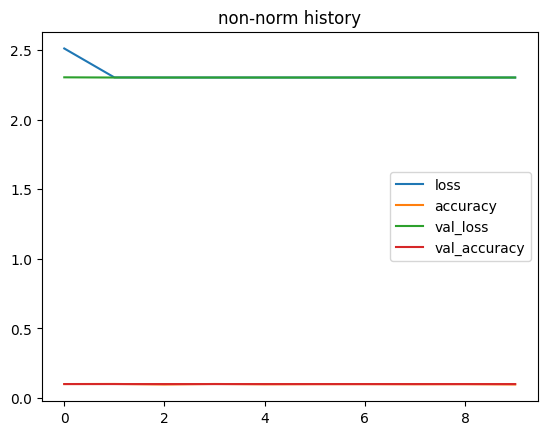

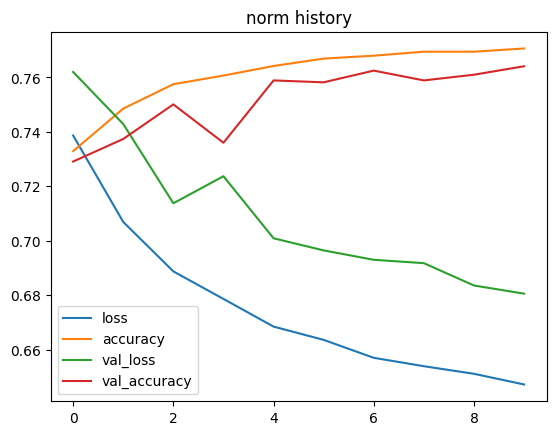

In [ ]:
import pandas as pd
pd.DataFrame(non_norm_his.history).plot(title="non-norm history")
pd.DataFrame(norm_history.history).plot(title="norm history")

In [ ]:
#finding the ideal learning rate

model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax'),
])

model2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

find_lr_his = model2.fit(train_data_norm,
                         train_labels,
                         epochs = 40,
                         validation_data = (test_data_norm, test_labels),
                         callbacks = [lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 7s 3ms/step - loss: 1.1872 - accuracy: 0.5485 - val_loss: 0.8968 - val_accuracy: 0.6938 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8380 - accuracy: 0.7079 - val_loss: 0.8209 - val_accuracy: 0.7164 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7762 - accuracy: 0.7232 - val_loss: 0.7672 - val_accuracy: 0.7258 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7474 - accuracy: 0.7309 - val_loss: 0.7560 - val_accuracy: 0.7259 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7300 - accuracy: 0.7347 - val_loss: 0.7490 - val_accuracy: 0.7321 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7181 - accuracy: 0.7381 - val_loss: 0.7321 - val_accuracy: 0.7309 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 7s

Text(0, 0.5, 'Loss')

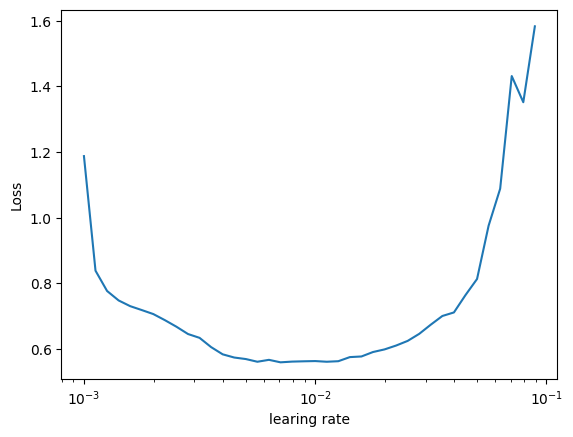

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_his.history["loss"])
plt.xlabel("learing rate")
plt.ylabel("Loss")


In [ ]:
#looks like ideal learning rate for me is aa bit less than around .007, so lets do 0.01

model3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax)
])

model3.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), #sparce lets us use integer representation instead of one-hot
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics = ['accuracy'])

his3 =  model3.fit(train_data_norm, train_labels, epochs = 10, validation_data = (test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.0778 - accuracy: 0.5620 - val_loss: 0.8642 - val_accuracy: 0.6510
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7691 - accuracy: 0.6885 - val_loss: 0.7413 - val_accuracy: 0.7056
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7009 - accuracy: 0.7178 - val_loss: 0.7104 - val_accuracy: 0.7153
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6732 - accuracy: 0.7342 - val_loss: 0.6709 - val_accuracy: 0.7576
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6548 - accuracy: 0.7538 - val_loss: 0.6857 - val_accuracy: 0.7598
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6429 - accuracy: 0.7648 - val_loss: 0.7001 - val_accuracy: 0.7609
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6331 - accuracy: 0.7728 - val_loss: 0.7590 - val_accuracy:

In [ ]:
#evaluating model (confusion matrix)

from sklearn.metrics import confusion_matrix
#lets make it pretty
import itertools
def make_cm(y_true, y_pred, classes=None, figsize=(10,10), textsize =15):
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis] #normalize

  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize = figsize)
  cax = ax.matshow(cm , cmap = plt.cm.Blues)
  fig.colorbar(cax)


  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  ax.set(title = "Confusion matrix",
        xlabel = "Predicted Label",
        ylabel = "True Label",
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels = labels,
        yticklabels = labels)
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ax.yaxis.label.set_size(textsize)
  ax.xaxis.label.set_size(textsize)
  ax.title.set_size(textsize)

  threshold = (cm.max() + cm.min()) / 2
  for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f})%",
            horizontalalignment="center",
            color = "white" if cm[i,j] > threshold else "black",
            size = textsize)

In [ ]:
y_probs = model3.predict(test_data_norm)
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[2.9590219e-09, 6.1962346e-08, 5.5273598e-20, 1.3139523e-13,
        2.9496236e-20, 1.8225618e-01, 2.1218656e-16, 6.9858652e-01,
        1.1058740e-04, 1.1904667e-01],
       [1.3390663e-02, 4.4186058e-06, 3.0968106e-01, 5.2191042e-03,
        4.0757790e-01, 3.5290802e-06, 2.4732615e-01, 2.5732704e-06,
        1.6794445e-02, 2.5531815e-08],
       [5.2205584e-04, 9.9788350e-01, 5.3187532e-10, 1.5910245e-03,
        4.2188544e-12, 2.9229961e-06, 4.3644380e-07, 6.3562830e-15,
        1.8398017e-11, 2.0333186e-08],
       [1.1666326e-04, 9.9845636e-01, 3.5131929e-11, 1.4232649e-03,
        5.5443806e-13, 3.5997409e-06, 6.2357287e-08, 2.4560631e-15,
        3.9612289e-12, 1.3403394e-08],
       [9.2528902e-02, 1.5572747e-04, 2.9361156e-01, 2.4103062e-02,
        1.2257342e-01, 1.6110431e-05, 4.5897374e-01, 1.0302955e-06,
        8.0362493e-03, 1.6032217e-07]], dtype=float32)

In [ ]:
class_names[tf.argmax(y_probs[0])]

'sneaker'

In [ ]:
y_preds = y_probs.argmax(axis=1)
y_preds[:5]

from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = test_labels, y_pred = y_preds)

array([[643,   0,  56, 161,  23,   1, 105,   0,  11,   0],
       [ 11, 921,   8,  50,   5,   0,   5,   0,   0,   0],
       [  8,   0, 567,  21, 319,   0,  80,   0,   5,   0],
       [ 11,   7,   5, 891,  38,   0,  39,   0,   9,   0],
       [  0,   0,  68,  55, 829,   0,  38,   0,  10,   0],
       [  1,   0,   0,   2,   0, 930,   0,  49,  17,   1],
       [101,   0, 185, 107, 393,   0, 190,   0,  24,   0],
       [  0,   0,   0,   0,   0,  35,   0, 960,   3,   2],
       [  0,   0,   3,  12,  46,   2,   4,   4, 929,   0],
       [  0,   0,   0,   1,   1,  82,   0, 277,   0, 639]])

In [ ]:
class_names

['tshirt',
 'trouser',
 'pullover',
 'dress',
 'Coat',
 'sandal',
 'shirt',
 'sneaker',
 'bag',
 'ankle boot']

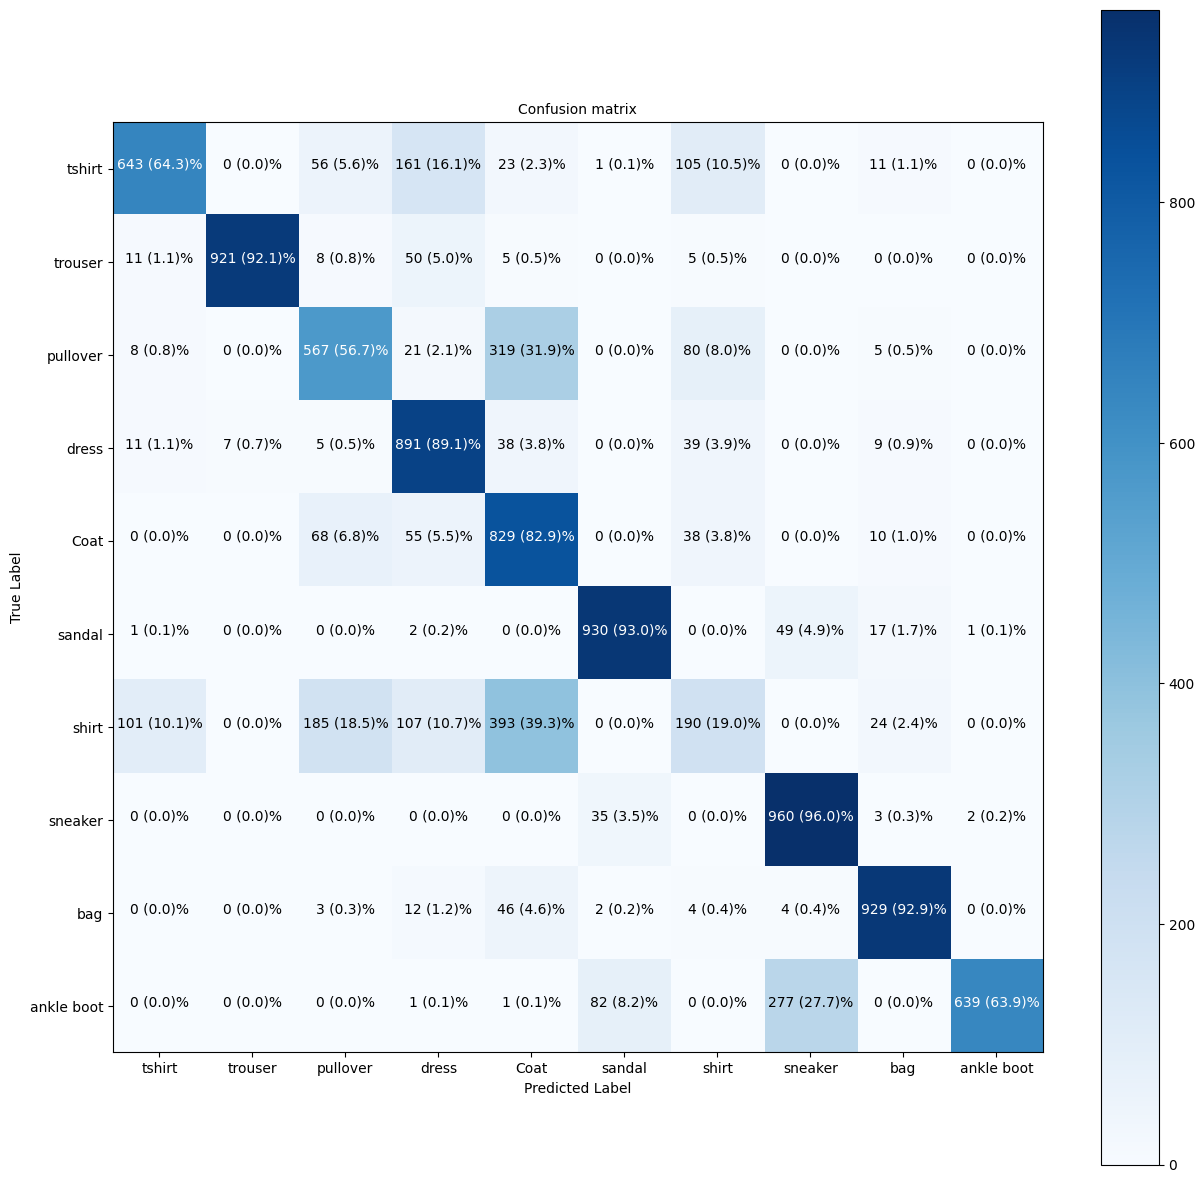

In [ ]:
make_cm(y_true = test_labels,
        y_pred = y_preds,
        classes = class_names,
        figsize = (15,15),
        textsize = 10)

In [ ]:
#analyzing model
model3.layers

In [ ]:
weights, biases = model3.layers[1].get_weights()
weights, weights.shape

(array([[-0.05850597, -0.0313955 , -1.1966261 ,  2.1632903 ],
        [ 1.1071408 ,  0.9590143 ,  0.11392913,  2.9103408 ],
        [ 0.3460208 , -0.7046679 ,  0.6594543 ,  5.9336553 ],
        ...,
        [ 3.077472  ,  0.78873324,  0.30298665,  0.28226113],
        [-0.48235056,  4.6552467 , -0.02184802,  0.9197886 ],
        [ 0.6158162 ,  1.6811742 , -1.9169661 ,  2.5220358 ]],
       dtype=float32),
 (784, 4))

In [ ]:
biases, biases.shape

(array([ 6.354153 ,  4.585303 ,  4.5764556, 10.091342 ], dtype=float32), (4,))

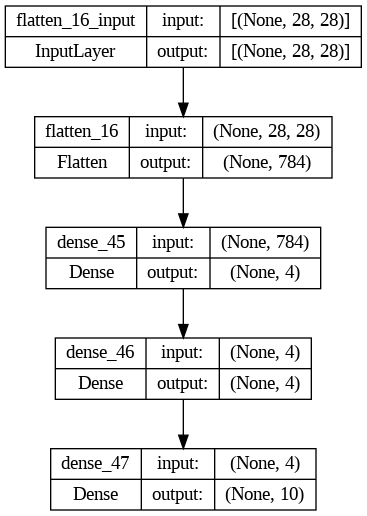

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model3, show_shapes=True)